# Sign Language MNIST Dataset

You can find the dataset on kaggle : https://www.kaggle.com/datamunge/sign-language-mnist

In [41]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

import os

In [42]:
# Since the data is already in the csv format so lets first read the data in the dataframe through pandas library!
df = pd.read_csv('../Sign Language MNIST/sign_mnist_train.csv')
df.head()
print(df.shape)

(27455, 785)


In [43]:
# reading through csv.reader method
reader = csv.reader('../Sign Language MNIST/sign_mnist_train.csv',delimiter=',')
    

In [44]:
# Reading the data

# You will need to write code that will read the file passed
# into this function. The first line contains the column headers
# so you should ignore it
# Each successive line contians 785 comma separated values between 0 and 255
# The first value is the label
# The rest are the pixel values for that picture
# The function will return 2 np.array types. One with all the labels
# One with all the images
# Tips: 
# If you read a full line (as 'row') then row[0] has the label
# and row[1:785] has the 784 pixel values
# Take a look at np.array_split to turn the 784 pixels into 28x28
# You are reading in strings, but need the values to be floats
# Check out np.array().astype for a conversion
def get_data(filename):
    
    with open(filename) as training_file:
        reader = csv.reader(training_file,delimiter=',')
        labels = []
        images = []
        next(reader) #Calling next(object) with the result of the previous step as object will retrieve the first row of the iterator then discard it.
        for row in reader:
            
            
            label = row[0]
            data = row[1:]
            
            img = np.array(data).reshape((28,28))
            images.append(img)
            labels.append(label)
            
        images = np.array(images).astype(float)
        labels = np.array(labels).astype(float)
        
    return images,labels


train_path = '../Sign Language MNIST/sign_mnist_train.csv'
test_path = '../Sign Language MNIST/sign_mnist_test.csv'

training_images,training_labels = get_data(train_path) 
testing_images,testing_labels = get_data(test_path)


In [45]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [46]:
# Here we will be adding an another dimension of the data  coz our convolution expects 4D tensors
# suppose we have data (27455,28,28) so we will convert it into (27455,28,28,1)

training_images = np.expand_dims(training_images,axis=-1)
testing_images = np.expand_dims(testing_images,axis=-1)


# Image Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.0,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range =0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.0)

print(training_images.shape)
print(testing_images.shape)



(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [51]:
# Defining the Model 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')
    
])

training_generator = train_datagen.flow(training_images,
                                       training_labels,
                                       batch_size=32)
testing_generator = test_datagen.flow(testing_images,
                                     testing_labels,
                                     batch_size=32)
model.summary()

# Compile the model

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

# Training the model

hist = model.fit_generator(training_generator,
                   epochs=20,
                   steps_per_epoch=len(training_images)/32,
                   validation_data=testing_generator,
                   validation_steps = len(testing_images)/32)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_9 (Dense)              (None, 26)               

In [53]:
model.evaluate(testing_images,testing_labels)

7172/7172 [==============================] - 1s 101us/sample - loss: 334.4358 - acc: 0.5424


[334.435763987229, 0.54238707]

# Plotting the Accuracy and Loss

Text(0.5, 1.0, 'Accuracy')

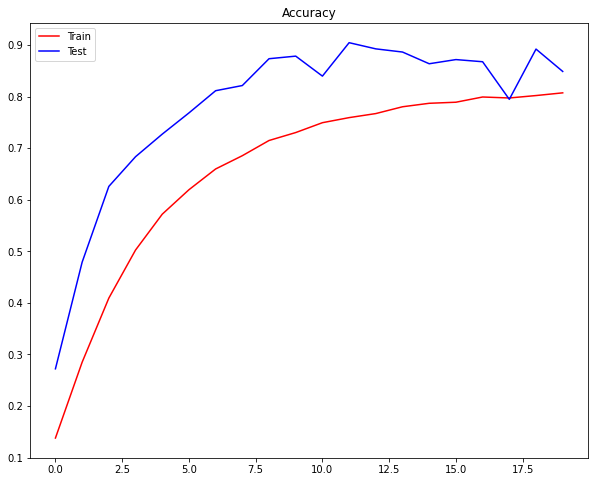

In [55]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'b')
plt.legend(['Train','Test'],loc = 'best')
plt.title('Accuracy')

Text(0, 0.5, 'Loss')

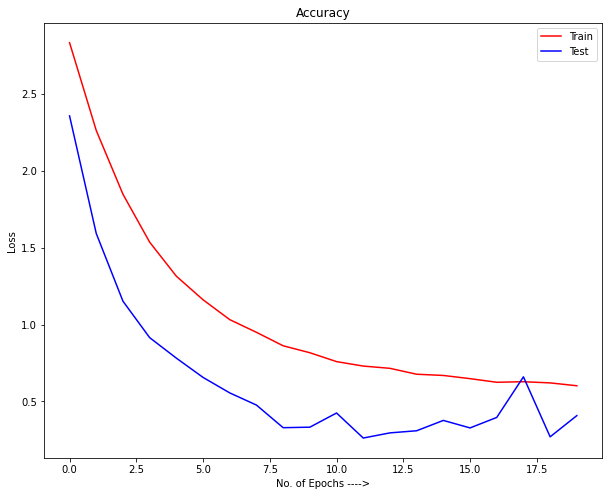

In [62]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')
plt.legend(['Train','Test'],loc = 'best')
plt.title('Accuracy')
plt.xlabel('No. of Epochs ---->')
plt.ylabel('Loss')